<a href="https://colab.research.google.com/github/Taiki-Yamada-Math/CombinatorialEvaluation/blob/main/CombinatorialEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import math
import collections
import itertools
import random
from itertools import combinations

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (5,665 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [ ]:
# Operations required to read files in Google Drive (if necessary)
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e5435d6b221827feb2114da3b9b6228c86343b06de6a552f7d44053913ae8944
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib
Mounted at /content/drive


In [2]:
#create the list of vertices, whete the weight range from 0.01 to 1.
def create_weighted_vertex_list(n, p):
  G = nx.fast_gnp_random_graph(n, p, 34)
  Nodelist = []
  nodeweight = []
  for node in range(0,n):
    Nodelist.append(node)
    weight_node = random.uniform(0.01, 1)
    nodeweight.append(weight_node)
  Nodeset = pd.DataFrame(Nodelist, columns = ["Name"])
  Nodeset["Worth"] = nodeweight
  return Nodeset

In [6]:
create_weighted_vertex_list(100,0.2)

,Name,Worth
0,0,0.917650
1,1,0.420905
2,2,0.705414
3,3,0.295390
4,4,0.590525
...,...,...
95,95,0.486366
96,96,0.577629
97,97,0.924051
98,98,0.432490


In [3]:
#create the list of vertices, whete the weight is 1.
def create_constant_vertex_list(n, p):
  G = nx.fast_gnp_random_graph(n, p, 34)
  Nodelist = []
  nodeweight = []
  for node in range(0,n):
    Nodelist.append(node)
    weight_node = 1
    nodeweight.append(weight_node)
  Nodeset = pd.DataFrame(Nodelist, columns = ["Name"])
  Nodeset["Worth"] = nodeweight
  return Nodeset

In [17]:
create_constant_vertex_list(100,0.2)

,Name,Worth
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
95,95,1
96,96,1
97,97,1
98,98,1


In [4]:
#create the list of edges, whete the weight range from 0.01 to 1.
def create_weighted_edge_list(n, p):
  G = nx.fast_gnp_random_graph(n, p, 34)
  Headset = []
  Tailset = []
  linkweight = []
  for edge in G.edges():
    Headset.append(edge[0])
    Tailset.append(edge[1])
    weight_link = random.uniform(0.01, 1)
    linkweight.append(weight_link)
  Linkset = pd.DataFrame(Headset, columns = ["Head"])
  Linkset["Tail"] = Tailset
  Linkset["Cost"] = linkweight
  return Linkset

In [8]:
create_weighted_edge_list(100,0.2)

,Head,Tail,Cost
0,0,3,0.050884
1,0,20,0.383451
2,0,39,0.136066
3,0,42,0.730255
4,0,47,0.374392
...,...,...,...
945,91,98,0.349201
946,92,97,0.138657
947,93,97,0.851464
948,94,98,0.179288


In [5]:
# Define a function to draw the graph
def create_graph(vertex_set, edge_set):
    G = nx.Graph()
    # Add vertices
    G.add_nodes_from(vertex_set)
    # Add edges
    for index, row in edge_set.iterrows():
      if row['Head'] != row['Tail']: # Exclusion of self-looping edges
       # Define the starting and ending points in edge_set.
        node0 = row['Head']
        node1 = row['Tail']
        # If there are overlapping edges, sum the costs.
        if G.has_node(node0) and G.has_node(node1):
            if G.has_edge(node0, node1):
                G[node0][node1]['weight'] += row['Cost']
            else:
                G.add_edge(node0, node1, weight=row['Cost'])

    G.remove_nodes_from(list(nx.isolates(G))) # Exclusion of isolated points
    return G

In [6]:
def view_graph(graph, vertex_set):
    plt.figure(figsize=(15,15))
    # Specify the drawing position of the graph
    pos = nx.spring_layout(graph, k=2)

    # Draw vertices
    vertex_weight = [vertex_set.loc[vertex_set['Name'] == node, 'Worth'].iloc[0] for node in graph.nodes()]
    node_sizes = [weight * 2000 for weight in vertex_weight]
    nx.draw_networkx_nodes(graph, pos, node_size= node_sizes, node_color='silver')

    # Draw edges
    edge_width = [ d["weight"] for (u,v,d) in graph.edges(data=True)]
    nx.draw_networkx_edges(graph, pos, width=edge_width, edge_color='black')

    # Draw node labels
    nx.draw_networkx_labels(graph, pos, font_size=12)

    # Drawing Execution
    plt.axis('off')  # Hide coordinate axes
    plt.show()

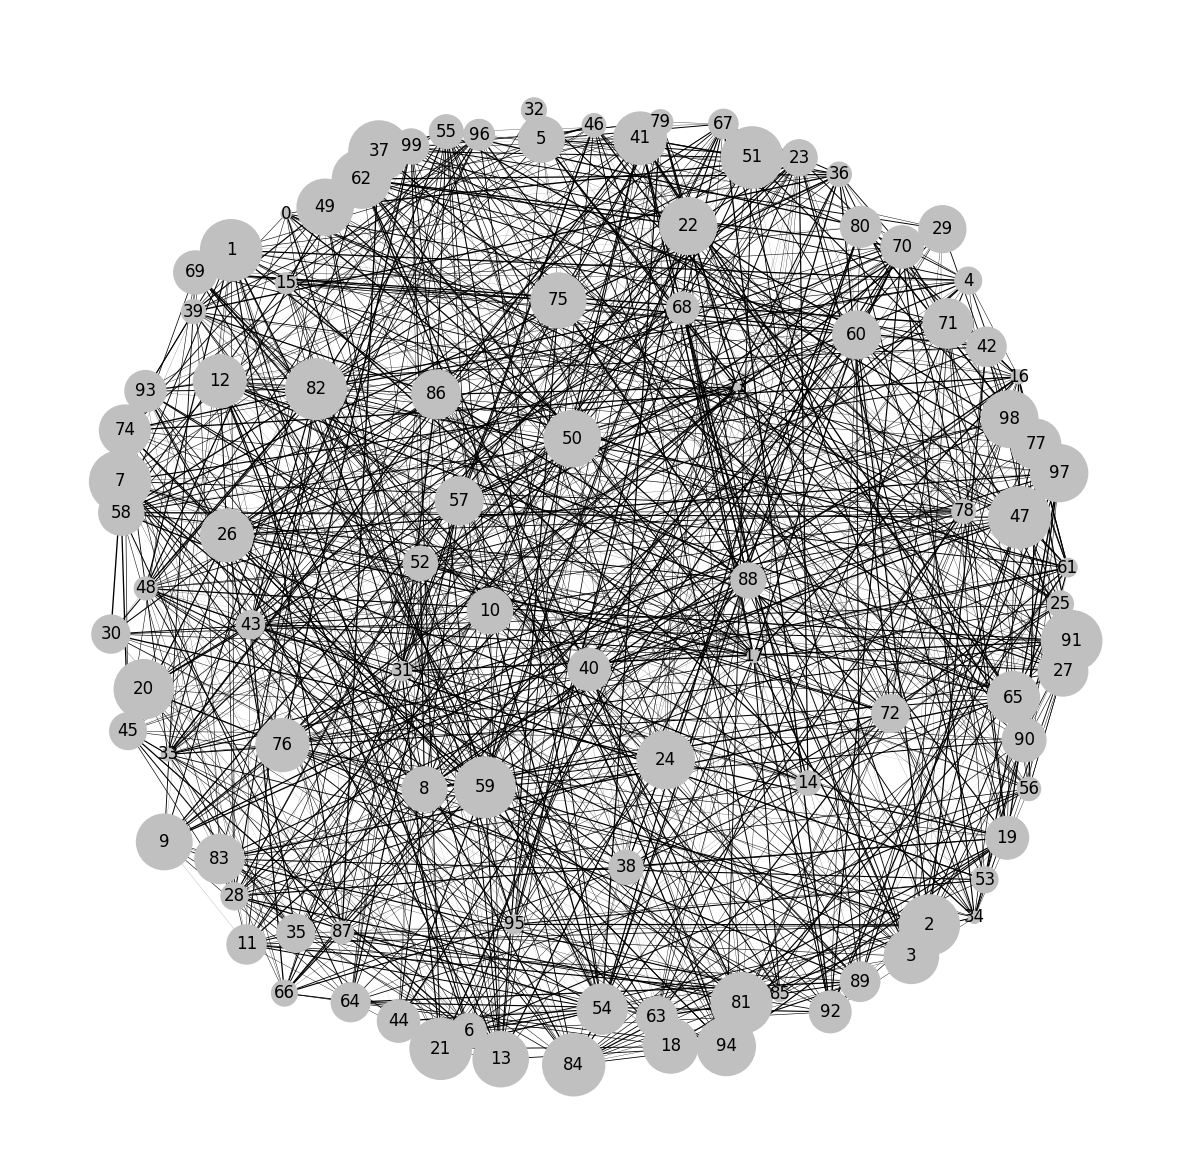

In [7]:
G = create_graph(create_weighted_vertex_list(100,0.2)['Name'], create_weighted_edge_list(100,0.2))
view_graph(G, create_weighted_vertex_list(100,0.2))

In [8]:
#calculate Forman curvature
def FormanRicciCurvature_Edge(Graph, edge, worth_vertex):
    #weight vertex
    weight_0 = worth_vertex.loc[worth_vertex['Name'] == edge[0], 'Worth'].iloc[0]
    weight_1 = worth_vertex.loc[worth_vertex['Name'] == edge[1], 'Worth'].iloc[0]
    #list of neighbors
    edge_0_nbr = list(Graph.neighbors(edge[0]))
    edge_1_nbr = list(Graph.neighbors(edge[1]))
    #calculation
    x = 0
    for vx in edge_0_nbr:
      vx_weight = weight_0 * math.sqrt(Graph.edges[edge[0], edge[1]]['weight'] / Graph.edges[edge[0], vx]['weight'])
      x += vx_weight
    y = 0
    for vy in edge_1_nbr:
      vy_weight = weight_1 * math.sqrt(Graph.edges[edge[0], edge[1]]['weight'] / Graph.edges[edge[1], vy]['weight'])
      y += vy_weight
    result = 2*weight_0 + 2*weight_1 - x - y
    return result

In [9]:
#calculate Forman Scalar curvature
def FormanScalarCurvature_list(graph, worth_vertex):
    vertex_list = [] #
    FormanScalar_list = []  #

    for x in graph.nodes():
      sum_Forman_value_x = 0
      Forman_scalar_x = 0
      weight_nbr = 0
      vertex_list.append(int(x))
      nbr_MG0_x = list(graph.neighbors(x))
      for y in nbr_MG0_x:
        Forman_value_xy = FormanRicciCurvature_Edge(graph, (x, y), worth_vertex)
        sum_Forman_value_x += Forman_value_xy
        weight_nbr += graph.edges[x, y]['weight']
      Forman_scalar_x = sum_Forman_value_x / weight_nbr
      FormanScalar_list.append(Forman_scalar_x)

    df_Forman = pd.DataFrame(
      {"Vertex": vertex_list,
      "Forman Scalar Curvature": FormanScalar_list})
    return df_Forman

In [28]:
FS = FormanScalarCurvature_list(G, create_weighted_vertex_list(100,0.2))
FS

,Vertex,Forman Scalar Curvature
0,0,-49.240454
1,1,-74.349278
2,2,-71.907351
3,3,-82.386856
4,4,-43.002273
...,...,...
95,95,-79.581699
96,96,-54.367097
97,97,-34.379084
98,98,-25.383504


In [12]:
#calculate each convenience on network
def convenience_network(graph, worth_vertex):
  # degree centrality
  degree_centrality = dict(graph.degree(weight="weight"))
  # eigenvector centrality
  eigenvector = nx.eigenvector_centrality(graph, weight ="weight")
  # betweenness centrality
  betweenness = nx.communicability_betweenness_centrality(graph)
  # closeness centrality
  closeness = nx.closeness_centrality(graph, distance="weight")
  # clustering
  clustering = nx.clustering(graph, weight="weight")
  W_d = []  # Create a list to store the calculated values
  W_e = []
  W_B = []
  W_C = []
  W_cl = []
  for node, centrality in degree_centrality.items():
    for i in range(len(worth_vertex)):
      if worth_vertex['Name'][i] == node:
        value = centrality
        W_d.append(value)  # Append the value to the list
        break
      else:
        continue
  for node, centrality in eigenvector.items():
    for i in range(len(worth_vertex)):
      if worth_vertex['Name'][i] == node:
        value = centrality
        W_e.append(value)  # Append the
        break
      else:
        continue
  for node, centrality in betweenness.items():
    for i in range(len(worth_vertex)):
      if worth_vertex['Name'][i] == node:
        value = worth_vertex['Worth'][i]*centrality
        W_B.append(value)
        break
      else:
        continue
  for node, centrality in closeness.items():
    for i in range(len(worth_vertex)):
      if worth_vertex['Name'][i] == node:
        value = centrality
        W_C.append(value)
        break
      else:
        continue
  for node, centrality in clustering.items():
    for i in range(len(worth_vertex)):
      if worth_vertex['Name'][i] == node:
        value = centrality
        W_cl.append(value)
        break
      else:
        continue

  df_centrality = pd.DataFrame(
    {"Degree centrality": W_d,
     "Eigenvalue centrality": W_e,
     "Betweenness centrality": W_B,
     "Closeness centrality": W_C,
     "Clustering": W_cl})
  return df_centrality # Return the list of values

In [29]:
con = convenience_network(G, create_weighted_vertex_list(100,0.2))
con

,Degree centrality,Eigenvalue centrality,Betweenness centrality,Closeness centrality,Clustering
0,6.800757,0.064736,0.040158,3.092249,0.071360
1,12.120270,0.130751,0.104133,3.236903,0.100381
2,8.540330,0.084729,0.132033,3.079958,0.075996
3,11.924123,0.114619,0.258563,3.987954,0.059362
4,9.573894,0.097630,0.060415,3.165993,0.091358
...,...,...,...,...,...
95,10.088967,0.088030,0.122508,4.066197,0.070631
96,7.388110,0.083460,0.065684,3.726239,0.085976
97,10.014589,0.100311,0.051373,2.696302,0.085267
98,5.357127,0.049580,0.048061,3.416520,0.081453


In [14]:
#calculate combinatorial evaluation
def Combinatorial_Evaluation_list(graph, worth_vertex):
  vertex_list = [] #
  Combinatorial_Evaluation_list = []
  for x in graph.nodes():
    weight_x = worth_vertex.loc[worth_vertex['Name'] ==x, 'Worth'].iloc[0]
    nbr_x = list(graph.neighbors(x))
    weight_edge_yz = 0
    weight_edge = 0
    for y in nbr_x:
      weight_edge_yz = 0 # Reset weight_edge_yz for each neighbor y
      for z in nbr_x: # Iterate through all neighbors of x
        if z != y: # Check if z is not equal to y
          # Make sure the edge (x, y) and (x, z) exist before accessing their weights
          if graph.has_edge(x, y) and graph.has_edge(x, z):
              # Add a check for division by zero in case an edge weight is 0
              if graph.edges[x, z]['weight'] != 0:
                weight_edge_yz += math.sqrt(graph.edges[x,y]['weight']/graph.edges[x,z]['weight'])
      weight_edge += weight_edge_yz
    combinatorial_evaluation_x = weight_x * abs(weight_edge - len(nbr_x))
    vertex_list.append(int(x))
    Combinatorial_Evaluation_list.append(combinatorial_evaluation_x)
  df_CE = pd.DataFrame(
    {"Vertex": vertex_list,
     "Combinatorial Evaluation": Combinatorial_Evaluation_list})
  return df_CE

In [30]:
CE = Combinatorial_Evaluation_list(G, create_weighted_vertex_list(100,0.2))
CE

,Vertex,Combinatorial Evaluation
0,0,144.940020
1,1,533.673137
2,2,338.454424
3,3,656.185418
4,4,171.457886
...,...,...
95,95,289.908316
96,96,184.129306
97,97,152.909273
98,98,80.311123


In [31]:
#combine these data
comparison_data = pd.concat([CE, FS['Forman Scalar Curvature'], con],axis =1)
comparison_data

,Vertex,Combinatorial Evaluation,Forman Scalar Curvature,Degree centrality,Eigenvalue centrality,Betweenness centrality,Closeness centrality,Clustering
0,0,144.940020,-49.240454,6.800757,0.064736,0.040158,3.092249,0.071360
1,1,533.673137,-74.349278,12.120270,0.130751,0.104133,3.236903,0.100381
2,2,338.454424,-71.907351,8.540330,0.084729,0.132033,3.079958,0.075996
3,3,656.185418,-82.386856,11.924123,0.114619,0.258563,3.987954,0.059362
4,4,171.457886,-43.002273,9.573894,0.097630,0.060415,3.165993,0.091358
...,...,...,...,...,...,...,...,...
95,95,289.908316,-79.581699,10.088967,0.088030,0.122508,4.066197,0.070631
96,96,184.129306,-54.367097,7.388110,0.083460,0.065684,3.726239,0.085976
97,97,152.909273,-34.379084,10.014589,0.100311,0.051373,2.696302,0.085267
98,98,80.311123,-25.383504,5.357127,0.049580,0.048061,3.416520,0.081453


In [32]:
#calculate correlation coefficient
result = comparison_data[['Combinatorial Evaluation','Forman Scalar Curvature','Degree centrality','Eigenvalue centrality','Betweenness centrality','Closeness centrality','Clustering']].corr()
result

,Combinatorial Evaluation,Forman Scalar Curvature,Degree centrality,Eigenvalue centrality,Betweenness centrality,Closeness centrality,Clustering
Combinatorial Evaluation,1.000000,-0.398032,0.532151,0.514286,0.397227,0.185455,-0.027501
Forman Scalar Curvature,-0.398032,1.000000,-0.186788,-0.198550,-0.150196,-0.259873,0.018970
Degree centrality,0.532151,-0.186788,1.000000,0.982571,0.487881,-0.077761,0.329672
Eigenvalue centrality,0.514286,-0.198550,0.982571,1.000000,0.488137,-0.085468,0.383912
Betweenness centrality,0.397227,-0.150196,0.487881,0.488137,1.000000,0.115749,0.119696
Closeness centrality,0.185455,-0.259873,-0.077761,-0.085468,0.115749,1.000000,-0.276126
Clustering,-0.027501,0.018970,0.329672,0.383912,0.119696,-0.276126,1.000000


In [26]:
#Function to draw a scatter plot
def plot_scat(x, y, centrality_name, ax):
  ax.scatter(x, y, s=10)
  ax.set_xlabel('Combinatorial Evaluation', fontsize=10)
  ax.set_ylabel(centrality_name, fontsize=10);

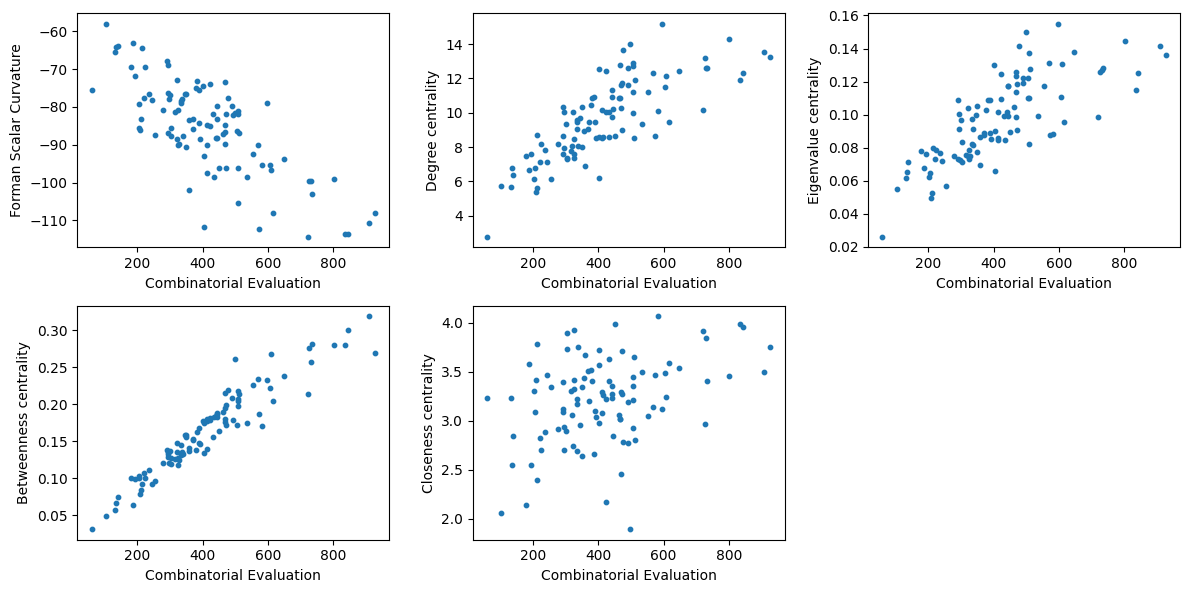

In [27]:
#Make a figure
fig = plt.figure(figsize=(4*3,3*2))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)

# Use actual column names from convenience_network output
plot_scat(comparison_data['Combinatorial Evaluation'], comparison_data['Forman Scalar Curvature'], 'Forman Scalar Curvature', ax1)
plot_scat(comparison_data['Combinatorial Evaluation'], comparison_data['Degree centrality'], 'Degree centrality', ax2)
plot_scat(comparison_data['Combinatorial Evaluation'], comparison_data['Eigenvalue centrality'], 'Eigenvalue centrality', ax3)
plot_scat(comparison_data['Combinatorial Evaluation'], comparison_data['Betweenness centrality'], 'Betweenness centrality', ax4)
plot_scat(comparison_data['Combinatorial Evaluation'], comparison_data['Closeness centrality'], 'Closeness centrality', ax5)

fig.tight_layout()